In [1]:
import pandas as pd 

# reading the data set 
df = pd.read_csv("drowsiness_dataset.csv")

# See the first few lines 
print(df.head())

# Dataset Summary 
print(df.describe())

# Checking for any null values 
print(df.isnull().sum())

/var/folders/k2/br7l8y790t39kyllbbpq37_h0000gn/T/ipykernel_3378/3359558620.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   heartRate   ppgGreen     ppgRed      ppgIR  drowsiness
0       54.0  1584091.0  5970731.0  6388383.0         0.0
1       54.0  1584091.0  5971202.0  6392174.0         0.0
2       54.0  1581111.0  5971295.0  6391469.0         0.0
3       54.0  1579343.0  5972599.0  6396137.0         0.0
4       54.0  1579321.0  5971906.0  6392898.0         0.0
          heartRate      ppgGreen        ppgRed         ppgIR    drowsiness
count  4.890260e+06  4.890260e+06  4.890260e+06  4.890260e+06  4.890260e+06
mean   7.814245e+01  2.073589e+06  5.643653e+06  5.728191e+06  8.593592e-01
std    1.296635e+01  4.418773e+05  3.909626e+05  4.313052e+05  8.370285e-01
min    5.000000e+01  5.897580e+05  4.441989e+06  4.409976e+06  0.000000e+00
25%    6.800000e+01  1.780621e+06  5.368700e+06  5.402542e+06  0.000000e+00
50%    7.800000e+01  2.044658e+06  5.646039e+06  5.818748e+06  1.000000e+00
75%    8.700000e+01  2.333117e+06  5.927128e+06  6.016016e+06  2.000000e+00
max    1.190000e+02  3.530798e+06  6.842637e

In [2]:
# Dividing data in the 4 periods 
num_periods = 4 
period_size = len(df) // num_periods 

# The data set is divided in the 4 time periods 
period_labels = ["Morning","Afternoon","Evening","Night"]
df['period'] = pd.cut(df.index, bins = num_periods, labels= period_labels)

print(df['period'].value_counts())

morning_data = df[df['period'] == 'Morning']
afternoon_data = df[df['period'] == 'Afternoon']
evening_data = df[df['period'] == 'Evening']
night_data = df[df['period'] == 'Night']


period
Morning      1222565
Afternoon    1222565
Evening      1222565
Night        1222565
Name: count, dtype: int64


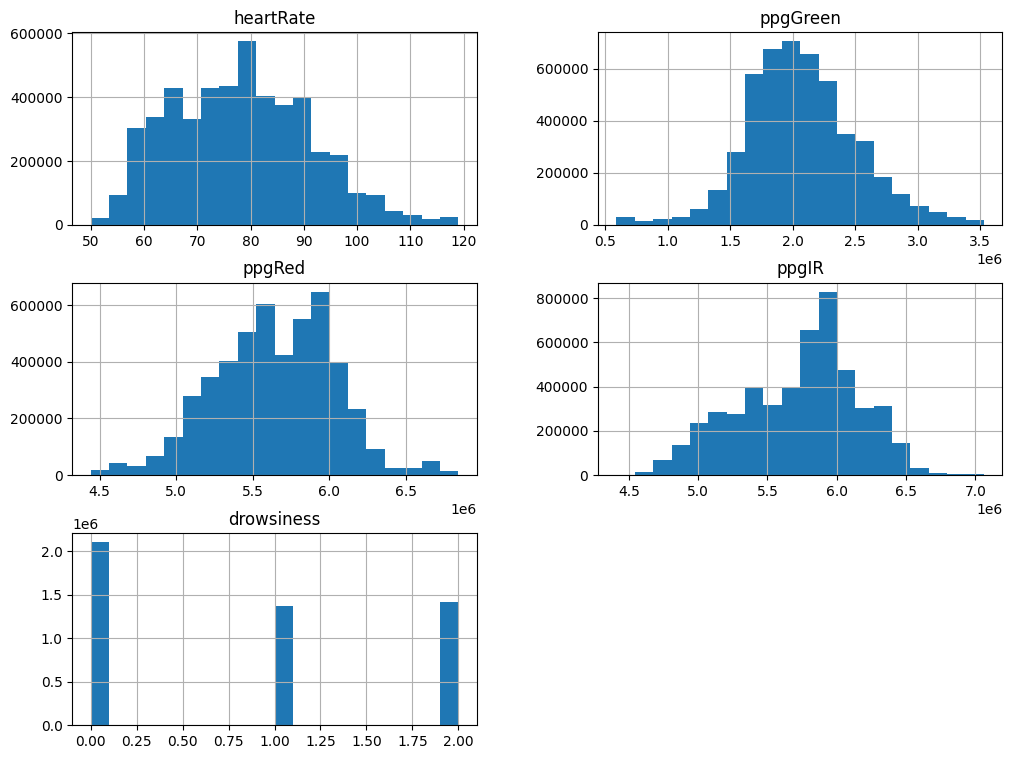

In [6]:
import matplotlib.pyplot as plt 

#Histogram for numerical columns
df.hist(bins = 20, figsize=(12, 9))
plt.show()

Correlation between drowsiness and heart rate(Morning): -0.6319114762754944
Correlation between drowsiness and PPG green(Morning): -0.08278873014767459
Correlation between drowsiness and PPG red(Morning): -0.6565096863047643
Correlation between drowsiness and PPG Infrared(Morning): -0.5784903897390827


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


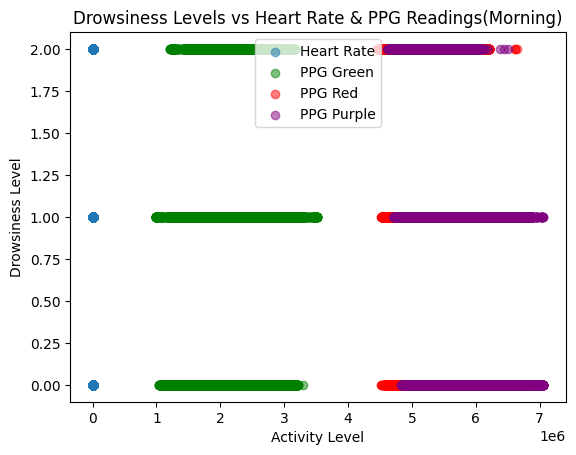

Correlation between drowsiness and heart rate(Afternoon): -0.7295576553744954
Correlation between drowsiness and PPG green(Afternoon): 0.24140212200218605
Correlation between drowsiness and PPG red(Afternoon): 0.036138940883998674
Correlation between drowsiness and PPG Infrared(Afternoon): -0.2655153229308298


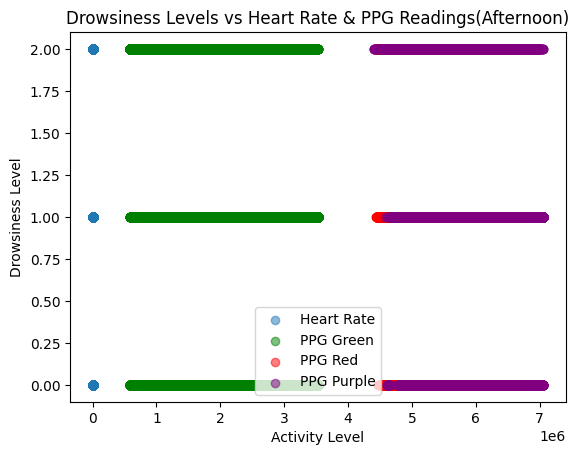

Correlation between drowsiness and heart rate(Evening): -0.6319114762754944
Correlation between drowsiness and PPG green(Evening): -0.08278873014767459
Correlation between drowsiness and PPG red(Evening): -0.6565096863047643
Correlation between drowsiness and PPG Infrared(Evening): -0.5784903897390827


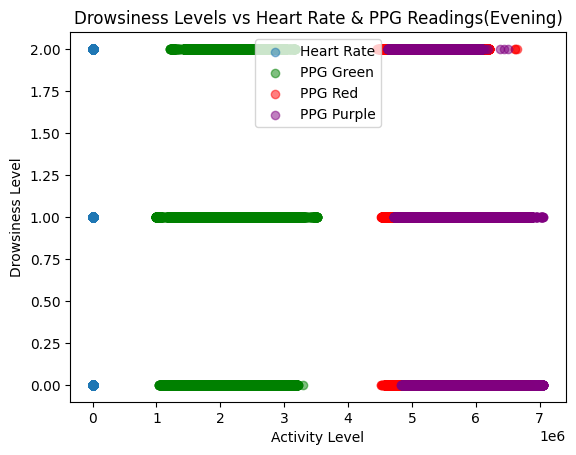

Correlation between drowsiness and heart rate(Night): -0.7295576553744954
Correlation between drowsiness and PPG green(Night): 0.24140212200218605
Correlation between drowsiness and PPG red(Night): 0.036138940883998674
Correlation between drowsiness and PPG Infrared(Night): -0.2655153229308298


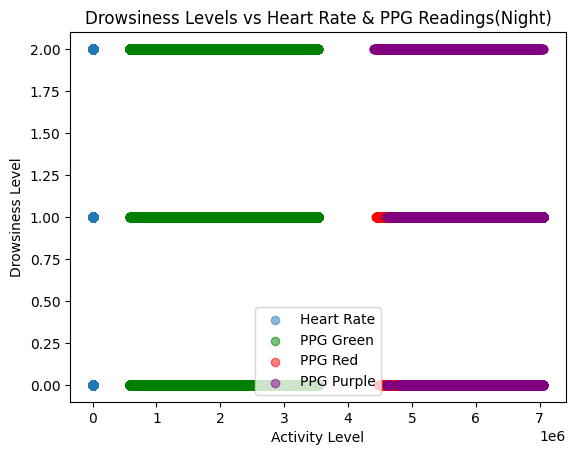

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Calculate & Plot correlations b/w Data & periods 
def calculate_and_plot_correlations(data, period_name):
    correlation_heart_rate = data['drowsiness'].corr(data['heartRate'])
    correlation_heart_ppg_green = data['drowsiness'].corr(data['ppgGreen'])
    correlation_heart_ppg_red = data['drowsiness'].corr(data['ppgRed'])
    correlation_heart_ppg_ir = data['drowsiness'].corr(data['ppgIR'])

    print(f'Correlation between drowsiness and heart rate({period_name}): {correlation_heart_rate}')
    print(f'Correlation between drowsiness and PPG green({period_name}): {correlation_heart_ppg_green}')
    print(f'Correlation between drowsiness and PPG red({period_name}): {correlation_heart_ppg_red}')
    print(f'Correlation between drowsiness and PPG Infrared({period_name}): {correlation_heart_ppg_ir}')

    plt.scatter(data['heartRate'], data['drowsiness'], alpha = 0.5, label='Heart Rate')
    plt.scatter(data['ppgGreen'], data['drowsiness'], alpha = 0.5, label='PPG Green', color = 'green')
    plt.scatter(data['ppgRed'], data['drowsiness'], alpha = 0.5, label='PPG Red', color = 'red')
    plt.scatter(data['ppgIR'], data['drowsiness'], alpha = 0.5, label='PPG Purple', color = 'purple')
    plt.title(f'Drowsiness Levels vs Heart Rate & PPG Readings({period_name})')
    plt.xlabel('Activity Level')
    plt.ylabel('Drowsiness Level')
    plt.legend()
    plt.show()


calculate_and_plot_correlations(morning_data, 'Morning')
calculate_and_plot_correlations(afternoon_data, 'Afternoon')
calculate_and_plot_correlations(evening_data, 'Evening')
calculate_and_plot_correlations(night_data, 'Night')


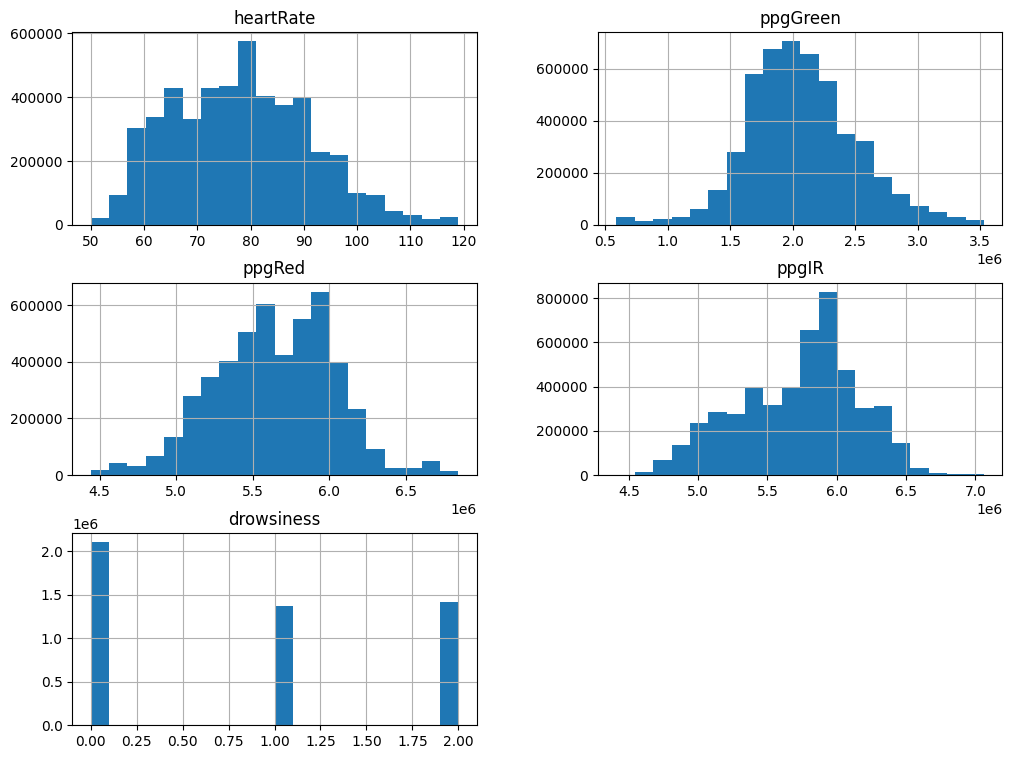

In [8]:
#Histogram for numerical columns
df.hist(bins = 20, figsize=(12, 9))
plt.show()

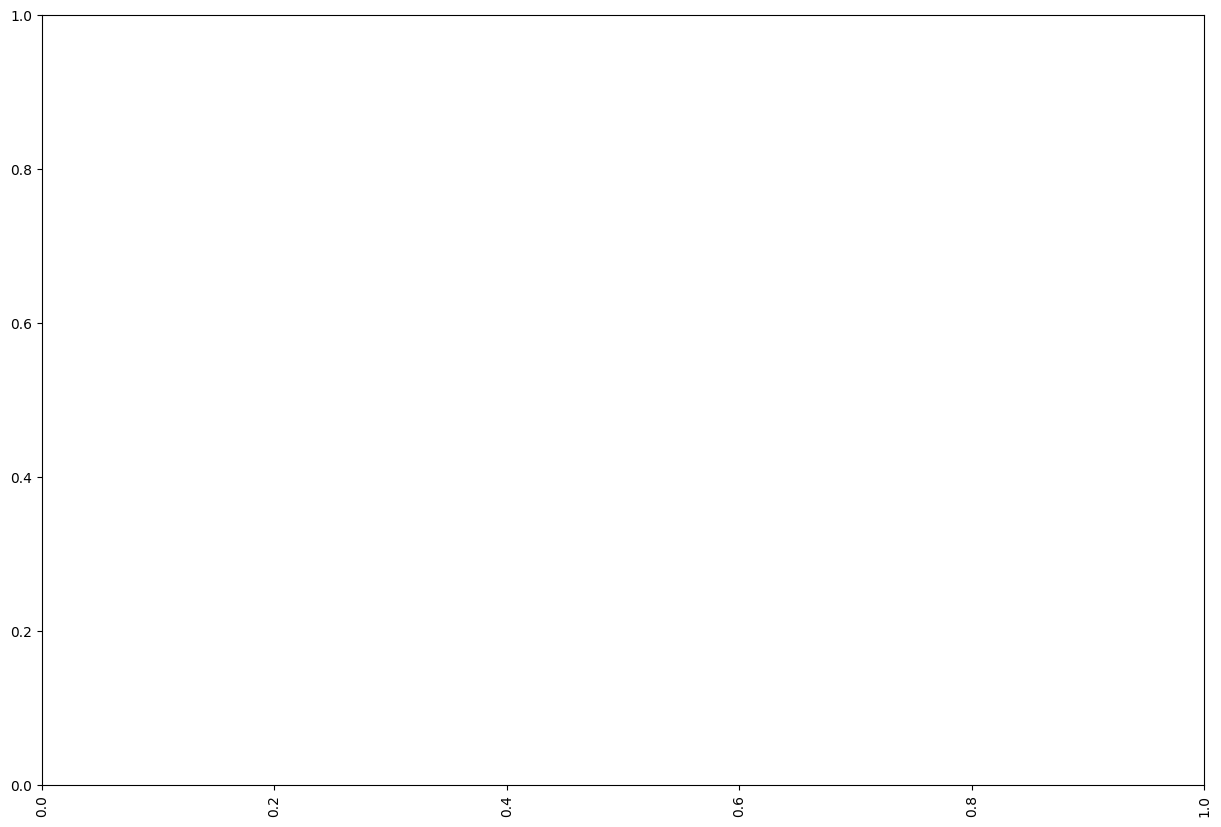

In [27]:
# Boxplot for numerical value
plt.figure(figsize=(15, 10))
sns.boxplot(df=df)
plt.xticks(rotation = 90)
plt.show()

In [12]:
# Box plot for detecting outliers in Transaction_Amount
plt.figure(figsize=(10, 6))
sns.boxplot(df=df, x='drowsiness')
plt.title('Box plot of Drowsiness')
plt.show()

ValueError: Could not interpret value `drowsiness` for `x`. Value is a string, but `data` was not passed.

<Figure size 1000x600 with 0 Axes>

In [28]:
# Distribution of Vehicle Speed
plt.figure(figsize=(10, 6))
sns.histplot(df=df, x='drowsiness', bins=30, kde=True)
plt.title('Distribution of Vehicle Speed')
plt.show()

ValueError: Could not interpret value `drowsiness` for `x`. Value is a string, but `data` was not passed.

<Figure size 1000x600 with 0 Axes>

In [19]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Morning'